In [1]:
import json

In [34]:
pip install pandas openpyxl



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Anandvj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Step1. Created unstructured format to structured format to csv file

In [61]:
#Hyderabad Cars
import pandas as pd
import ast

# Load the dataset with the correct engine
file_path = 'hyderabad_cars.xlsx'
data = pd.read_excel(file_path, sheet_name='hyderabad_cars.csv', engine='openpyxl')

# Convert string representations of dictionaries into actual dictionaries
data['new_car_detail'] = data['new_car_detail'].apply(ast.literal_eval)
data['new_car_overview'] = data['new_car_overview'].apply(ast.literal_eval)
data['new_car_feature'] = data['new_car_feature'].apply(ast.literal_eval)
data['new_car_specs'] = data['new_car_specs'].apply(ast.literal_eval)

# Function to extract data from nested dictionaries
def extract_details(row):
    details = row.get('new_car_detail', {})
    overview = row.get('new_car_overview', {})
    features = row.get('new_car_feature', {})
    specs = row.get('new_car_specs', {})
    
    # Extracting fields from details
    fuel_type = details.get('ft')
    body_type = details.get('bt')
    kilometers = details.get('km')
    price = details.get('price')
    car_model = details.get('model')
    car_age = details.get('modelYear')
    
    
    # Extracting fields from overview (like registration year, model, etc.)
    overview_dict = {item['key']: item['value'] for item in overview.get('top', [])}
    
    # Extracting features (listing them as comma-separated values)
    feature_list = [feature['value'] for feature in features.get('top', [])]
    feature_str = ', '.join(feature_list)
    
    # Extracting specifications (like engine power, mileage, etc.)
    specs_dict = {item['key']: item['value'] for item in specs.get('top', [])}
    
    # Return a flattened structure
    return pd.Series({
        'Fuel_Type': fuel_type,
        'Body_Type': body_type,
        'Kilometers_Driven': kilometers,
        'Registration_Year': overview_dict.get('Registration Year'),
        'Car_Model': car_model,
        'Ownership': overview_dict.get('Ownership'),
        'Features': feature_str,
        'Engine_Power': specs_dict.get('Max Power'),
        'Mileage': specs_dict.get('Mileage'),
        'Car_Link': row.get('car_links'),
        'Price': price,
        'Car_Age': car_age

    })

# Apply the extraction function to each row
hyderabad_df = data.apply(extract_details, axis=1)

# Display the structured dataset
print(hyderabad_df.head())

# Save the structured data to a new Excel file (optional)
hyderabad_df.to_csv('hyderabad_cars.csv', index=False)


  Fuel_Type  Body_Type Kilometers_Driven Registration_Year        Car_Model  \
0    Petrol  Hatchback            20,000              2022  Volkswagen Polo   
1    Petrol  Hatchback            85,582          Oct 2014      Hyundai EON   
2    Petrol        SUV            10,000              2023    Hyundai Venue   
3    Petrol  Hatchback            50,750          Mar 2017    Maruti Baleno   
4    Petrol        SUV            10,000              2022    Mahindra Thar   

      Ownership                                           Features  \
0   First Owner  Power Steering, Power Windows Front, Air Condi...   
1  Second Owner  Power Steering, Power Windows Front, Air Condi...   
2   First Owner  Power Steering, Power Windows Front, Air Condi...   
3   First Owner  Power Steering, Power Windows Front, Air Condi...   
4   First Owner  Power Steering, Power Windows Front, Air Condi...   

  Engine_Power     Mileage                                           Car_Link  \
0    108.62bhp  16.47 k

In [62]:
hyderabad_df

,Fuel_Type,Body_Type,Kilometers_Driven,Registration_Year,Car_Model,Ownership,Features,Engine_Power,Mileage,Car_Link,Price,Car_Age
0,Petrol,Hatchback,"20,000",2022,Volkswagen Polo,First Owner,"Power Steering, Power Windows Front, Air Condi...",108.62bhp,16.47 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 10.44 Lakh,2022
1,Petrol,Hatchback,"85,582",Oct 2014,Hyundai EON,Second Owner,"Power Steering, Power Windows Front, Air Condi...",55.2bhp,21.1 kmpl,https://www.cardekho.com/buy-used-car-details/...,₹ 2.60 Lakh,2014
2,Petrol,SUV,"10,000",2023,Hyundai Venue,First Owner,"Power Steering, Power Windows Front, Air Condi...",81.80bhp,None,https://www.cardekho.com/used-car-details/used...,₹ 9.55 Lakh,2023
3,Petrol,Hatchback,"50,750",Mar 2017,Maruti Baleno,First Owner,"Power Steering, Power Windows Front, Air Condi...",83.1bhp,21.4 kmpl,https://www.cardekho.com/buy-used-car-details/...,₹ 6.71 Lakh,2017
4,Petrol,SUV,"10,000",2022,Mahindra Thar,First Owner,"Power Steering, Power Windows Front, Air Condi...",150bhp,None,https://www.cardekho.com/used-car-details/used...,₹ 19 Lakh,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
1478,Diesel,SUV,"60,000",2013,Mahindra XUV500,First Owner,"Power Steering, Power Windows Front, Air Condi...",140bhp,15.1 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 7 Lakh,2013
1479,Diesel,Sedan,"50,000",2014,Jaguar XF,First Owner,"Power Steering, Power Windows Front, Air Condi...",270.9bhp,14.74 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 20 Lakh,2014
1480,Diesel,Sedan,"1,20,000",2018,BMW 5 Series,Third Owner,"Power Steering, Power Windows Front, Air Condi...",187.74bhp,20.37 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 35 Lakh,2018
1481,Diesel,SUV,"50,000",2019,Tata Nexon,Second Owner,"Power Steering, Power Windows Front, Air Condi...",108.5bhp,21.5 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 8.50 Lakh,2019


In [63]:
#Bangalore cars
import pandas as pd
import ast

# Load the dataset with the correct engine
file_path = 'bangalore_cars.xlsx'
data = pd.read_excel(file_path, sheet_name='bangalore_cars.csv', engine='openpyxl')

# Convert string representations of dictionaries into actual dictionaries
data['new_car_detail'] = data['new_car_detail'].apply(ast.literal_eval)
data['new_car_overview'] = data['new_car_overview'].apply(ast.literal_eval)
data['new_car_feature'] = data['new_car_feature'].apply(ast.literal_eval)
data['new_car_specs'] = data['new_car_specs'].apply(ast.literal_eval)

# Function to extract data from nested dictionaries
def extract_details(row):
    details = row.get('new_car_detail', {})
    overview = row.get('new_car_overview', {})
    features = row.get('new_car_feature', {})
    specs = row.get('new_car_specs', {})
    
    # Extracting fields from details
    fuel_type = details.get('ft')
    body_type = details.get('bt')
    kilometers = details.get('km')
    price = details.get('price')
    car_model = details.get('model')
    car_age = details.get('modelYear')
    
    
    # Extracting fields from overview (like registration year, model, etc.)
    overview_dict = {item['key']: item['value'] for item in overview.get('top', [])}
    
    # Extracting features (listing them as comma-separated values)
    feature_list = [feature['value'] for feature in features.get('top', [])]
    feature_str = ', '.join(feature_list)
    
    # Extracting specifications (like engine power, mileage, etc.)
    specs_dict = {item['key']: item['value'] for item in specs.get('top', [])}
    
    # Return a flattened structure
    return pd.Series({
        'Fuel_Type': fuel_type,
        'Body_Type': body_type,
        'Kilometers_Driven': kilometers,
        'Registration_Year': overview_dict.get('Registration Year'),
        'Car_Model': car_model,
        'Ownership': overview_dict.get('Ownership'),
        'Features': feature_str,
        'Engine_Power': specs_dict.get('Max Power'),
        'Mileage': specs_dict.get('Mileage'),
        'Car_Link': row.get('car_links'),
        'Price': price,
        'Car_Age': car_age
        })

# Apply the extraction function to each row
bangalore_df = data.apply(extract_details, axis=1)

# Display the structured dataset
print(bangalore_df.head())

# Save the structured data to a new Excel file (optional)
bangalore_df.to_csv('bangalore_cars.csv', index=False)


  Fuel_Type  Body_Type Kilometers_Driven Registration_Year  \
0    Petrol  Hatchback          1,20,000              2015   
1    Petrol        SUV            32,706          Feb 2018   
2    Petrol  Hatchback            11,949         Sept 2018   
3    Petrol      Sedan            17,794          Dec 2014   
4    Diesel        SUV            60,000              2015   

            Car_Model     Ownership  \
0      Maruti Celerio   Third Owner   
1       Ford Ecosport  Second Owner   
2          Tata Tiago   First Owner   
3       Hyundai Xcent   First Owner   
4  Maruti SX4 S Cross   First Owner   

                                            Features Engine_Power     Mileage  \
0  Power Steering, Power Windows Front, Air Condi...     67.04bhp   23.1 kmpl   
1  Power Steering, Power Windows Front, Air Condi...    121.31bhp     17 kmpl   
2  Power Steering, Power Windows Front, Air Condi...        84bhp  23.84 kmpl   
3  Power Steering, Power Windows Front, Air Condi...     81.86bhp   

In [64]:
bangalore_df

,Fuel_Type,Body_Type,Kilometers_Driven,Registration_Year,Car_Model,Ownership,Features,Engine_Power,Mileage,Car_Link,Price,Car_Age
0,Petrol,Hatchback,"1,20,000",2015,Maruti Celerio,Third Owner,"Power Steering, Power Windows Front, Air Condi...",67.04bhp,23.1 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 4 Lakh,2015
1,Petrol,SUV,"32,706",Feb 2018,Ford Ecosport,Second Owner,"Power Steering, Power Windows Front, Air Condi...",121.31bhp,17 kmpl,https://www.cardekho.com/buy-used-car-details/...,₹ 8.11 Lakh,2018
2,Petrol,Hatchback,"11,949",Sept 2018,Tata Tiago,First Owner,"Power Steering, Power Windows Front, Air Condi...",84bhp,23.84 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 5.85 Lakh,2018
3,Petrol,Sedan,"17,794",Dec 2014,Hyundai Xcent,First Owner,"Power Steering, Power Windows Front, Air Condi...",81.86bhp,19.1 kmpl,https://www.cardekho.com/buy-used-car-details/...,₹ 4.62 Lakh,2014
4,Diesel,SUV,"60,000",2015,Maruti SX4 S Cross,First Owner,"Power Steering, Power Windows Front, Air Condi...",88.5bhp,23.65 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 7.90 Lakh,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1476,Diesel,SUV,"1,56,039",May 2012,Toyota Fortuner,Second Owner,"Power Steering, Power Windows Front, Air Condi...",168.5bhp,12.55 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 16.49 Lakh,2012
1477,Petrol,Sedan,"56,000",Jun 2008,Maruti SX4,Second Owner,"Power Steering, Power Windows Front, Air Condi...",104.68,15 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 3.30 Lakh,2008
1478,Petrol,Hatchback,"42,000",Sept 2014,Honda Brio,Second Owner,"Power Steering, Power Windows Front, Air Condi...",86.8bhp,19.4 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 4.25 Lakh,2014
1479,Diesel,Hatchback,"93,003",Dec 2018,Hyundai i20,First Owner,"Power Steering, Power Windows Front, Air Condi...",88.73bhp,22.54 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 7.50 Lakh,2018


In [65]:
#chennai_cars
import pandas as pd
import ast

# Load the dataset with the correct engine
file_path = 'chennai_cars.xlsx'
data = pd.read_excel(file_path, sheet_name='chennai_cars.csv', engine='openpyxl')

# Convert string representations of dictionaries into actual dictionaries
data['new_car_detail'] = data['new_car_detail'].apply(ast.literal_eval)
data['new_car_overview'] = data['new_car_overview'].apply(ast.literal_eval)
data['new_car_feature'] = data['new_car_feature'].apply(ast.literal_eval)
data['new_car_specs'] = data['new_car_specs'].apply(ast.literal_eval)

# Function to extract data from nested dictionaries
def extract_details(row):
    details = row.get('new_car_detail', {})
    overview = row.get('new_car_overview', {})
    features = row.get('new_car_feature', {})
    specs = row.get('new_car_specs', {})
    
    # Extracting fields from details
    fuel_type = details.get('ft')
    body_type = details.get('bt')
    kilometers = details.get('km')
    price = details.get('price')
    car_model = details.get('model')
    car_age = details.get('modelYear')
    
    
    # Extracting fields from overview (like registration year, model, etc.)
    overview_dict = {item['key']: item['value'] for item in overview.get('top', [])}
    
    # Extracting features (listing them as comma-separated values)
    feature_list = [feature['value'] for feature in features.get('top', [])]
    feature_str = ', '.join(feature_list)
    
    # Extracting specifications (like engine power, mileage, etc.)
    specs_dict = {item['key']: item['value'] for item in specs.get('top', [])}
    
    # Return a flattened structure
    return pd.Series({
        'Fuel_Type': fuel_type,
        'Body_Type': body_type,
        'Kilometers_Driven': kilometers,
        'Registration_Year': overview_dict.get('Registration Year'),
        'Car_Model': car_model,
        'Ownership': overview_dict.get('Ownership'),
        'Features': feature_str,
        'Engine_Power': specs_dict.get('Max Power'),
        'Mileage': specs_dict.get('Mileage'),
        'Car_Link': row.get('car_links'),
        'Price': price,
        'Car_Age': car_age
    })

# Apply the extraction function to each row
chennai_df = data.apply(extract_details, axis=1)

# Display the structured dataset
print(chennai_df.head())

# Save the structured data to a new Excel file (optional)
chennai_df.to_csv('chennai_cars.csv', index=False)


  Fuel_Type  Body_Type Kilometers_Driven Registration_Year       Car_Model  \
0    Petrol        SUV            20,000              2022       Kia Sonet   
1    Petrol   Minivans            20,687          Feb 2015     Maruti Eeco   
2    Petrol        SUV            30,000              2021  Nissan Magnite   
3    Petrol  Hatchback            59,247          May 2015     Hyundai i10   
4    Petrol  Hatchback            50,000              2015      Honda Jazz   

     Ownership                                           Features  \
0  First Owner  Power Steering, Power Windows Front, Air Condi...   
1  First Owner  Low Fuel Warning Light, Accessory Power Outlet...   
2  First Owner  Power Steering, Power Windows Front, Air Condi...   
3  First Owner  Power Steering, Power Windows Front, Air Condi...   
4  First Owner  Power Steering, Power Windows Front, Air Condi...   

  Engine_Power     Mileage                                           Car_Link  \
0    118.36bhp        None  https:/

In [66]:
chennai_df

,Fuel_Type,Body_Type,Kilometers_Driven,Registration_Year,Car_Model,Ownership,Features,Engine_Power,Mileage,Car_Link,Price,Car_Age
0,Petrol,SUV,"20,000",2022,Kia Sonet,First Owner,"Power Steering, Power Windows Front, Air Condi...",118.36bhp,None,https://www.cardekho.com/used-car-details/used...,₹ 11.50 Lakh,2022
1,Petrol,Minivans,"20,687",Feb 2015,Maruti Eeco,First Owner,"Low Fuel Warning Light, Accessory Power Outlet...",73bhp,15.37 kmpl,https://www.cardekho.com/buy-used-car-details/...,₹ 4.15 Lakh,2015
2,Petrol,SUV,"30,000",2021,Nissan Magnite,First Owner,"Power Steering, Power Windows Front, Air Condi...",98.63bhp,20 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 7.50 Lakh,2021
3,Petrol,Hatchback,"59,247",May 2015,Hyundai i10,First Owner,"Power Steering, Power Windows Front, Air Condi...",68.05bhp,19.81 kmpl,https://www.cardekho.com/buy-used-car-details/...,₹ 3.98 Lakh,2015
4,Petrol,Hatchback,"50,000",2015,Honda Jazz,First Owner,"Power Steering, Power Windows Front, Air Condi...",88.7bhp,18.7 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 5.50 Lakh,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1414,Petrol,Hatchback,"42,891",Jun 2018,Maruti Swift,First Owner,"Power Steering, Power Windows Front, Air Condi...",81.80bhp,22 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 6.20 Lakh,2018
1415,Diesel,SUV,"59,100",Feb 2019,Renault Duster,First Owner,"Power Steering, Power Windows Front, Air Condi...",83.8bhp,19.87 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 8.90 Lakh,2018
1416,Petrol,SUV,"55,913",Aug 2018,Tata Nexon,First Owner,"Power Steering, Power Windows Front, Air Condi...",108.5bhp,17 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 8.01 Lakh,2018
1417,Diesel,SUV,"65,000",Aug 2017,Volkswagen Tiguan,First Owner,"Power Steering, Power Windows Front, Air Condi...",141bhp,16.65 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 20.50 Lakh,2017


In [67]:
#delhi_cars
import pandas as pd
import ast

# Load the dataset with the correct engine
file_path = 'delhi_cars.xlsx'
data = pd.read_excel(file_path, sheet_name='delhi_cars.csv', engine='openpyxl')

# Convert string representations of dictionaries into actual dictionaries
data['new_car_detail'] = data['new_car_detail'].apply(ast.literal_eval)
data['new_car_overview'] = data['new_car_overview'].apply(ast.literal_eval)
data['new_car_feature'] = data['new_car_feature'].apply(ast.literal_eval)
data['new_car_specs'] = data['new_car_specs'].apply(ast.literal_eval)

# Function to extract data from nested dictionaries
def extract_details(row):
    details = row.get('new_car_detail', {})
    overview = row.get('new_car_overview', {})
    features = row.get('new_car_feature', {})
    specs = row.get('new_car_specs', {})
    
    # Extracting fields from details
    fuel_type = details.get('ft')
    body_type = details.get('bt')
    kilometers = details.get('km')
    price = details.get('price')
    car_model = details.get('model')
    car_age = details.get('modelYear')
    
    # Extracting fields from overview (like registration year, model, etc.)
    overview_dict = {item['key']: item['value'] for item in overview.get('top', [])}
    
    # Extracting features (listing them as comma-separated values)
    feature_list = [feature['value'] for feature in features.get('top', [])]
    feature_str = ', '.join(feature_list)
    
    # Extracting specifications (like engine power, mileage, etc.)
    specs_dict = {item['key']: item['value'] for item in specs.get('top', [])}
    
    # Return a flattened structure
    return pd.Series({
        'Fuel_Type': fuel_type,
        'Body_Type': body_type,
        'Kilometers_Driven': kilometers,
        'Registration_Year': overview_dict.get('Registration Year'),
        'Car_Model': car_model,
        'Ownership': overview_dict.get('Ownership'),
        'Features': feature_str,
        'Engine_Power': specs_dict.get('Max Power'),
        'Mileage': specs_dict.get('Mileage'),
        'Car_Link': row.get('car_links'),
        'Price': price,
        'Car_Age': car_age
    })

# Apply the extraction function to each row
delhi_df = data.apply(extract_details, axis=1)

# Display the structured dataset
print(delhi_df.head())

# Save the structured data to a new Excel file (optional)
delhi_df.to_csv('delhi_cars.csv', index=False)


  Fuel_Type  Body_Type Kilometers_Driven Registration_Year          Car_Model  \
0    Diesel        SUV            10,000              2022         Kia Seltos   
1    Petrol        SUV            57,437          May 2016      Hyundai Creta   
2    Petrol        SUV             8,000          Dec 2020  Mercedes-Benz GLC   
3    Petrol  Hatchback            28,151          Jan 2019       Maruti Swift   
4    Petrol        SUV            60,000              2017      Hyundai Creta   

      Ownership                                           Features  \
0   First Owner  Power Steering, Power Windows Front, Air Condi...   
1  Second Owner  Power Steering, Power Windows Front, Air Condi...   
2   First Owner  Power Steering, Power Windows Front, Air Condi...   
3  Second Owner  Power Steering, Power Windows Front, Air Condi...   
4   First Owner  Power Steering, Power Windows Front, Air Condi...   

  Engine_Power     Mileage                                           Car_Link  \
0    113.43

In [68]:
delhi_df

,Fuel_Type,Body_Type,Kilometers_Driven,Registration_Year,Car_Model,Ownership,Features,Engine_Power,Mileage,Car_Link,Price,Car_Age
0,Diesel,SUV,"10,000",2022,Kia Seltos,First Owner,"Power Steering, Power Windows Front, Air Condi...",113.43bhp,18 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 19 Lakh,2022
1,Petrol,SUV,"57,437",May 2016,Hyundai Creta,Second Owner,"Power Steering, Power Windows Front, Air Condi...",121.3bhp,15.29 kmpl,https://www.cardekho.com/buy-used-car-details/...,₹ 7.62 Lakh,2016
2,Petrol,SUV,"8,000",Dec 2020,Mercedes-Benz GLC,First Owner,"Power Steering, Power Windows Front, Air Condi...",197bhp,12.74 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 56 Lakh,2020
3,Petrol,Hatchback,"28,151",Jan 2019,Maruti Swift,Second Owner,"Power Steering, Power Windows Front, Air Condi...",88.50bhp,22.38 kmpl,https://www.cardekho.com/buy-used-car-details/...,₹ 5.23 Lakh,2018
4,Petrol,SUV,"60,000",2017,Hyundai Creta,First Owner,"Power Steering, Power Windows Front, Air Condi...",121.3bhp,15.29 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 7.65 Lakh,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Petrol,Sedan,"60,000",2019,Honda City,First Owner,"Power Steering, Power Windows Front, Air Condi...",117.6bhp,18 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 9 Lakh,2019
1481,Petrol,SUV,"20,000",2021,Kia Sonet,First Owner,"Power Steering, Power Windows Front, Air Condi...",81.86bhp,18.4 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 9.50 Lakh,2021
1482,Petrol,Sedan,"60,000",2011,Hyundai Verna,First Owner,"Power Steering, Power Windows Front, Air Condi...",121.3bhp,17.01 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 4.18 Lakh,2011
1483,Diesel,SUV,"38,000",Oct 2019,Hyundai Creta,First Owner,"Power Steering, Power Windows Front, Air Condi...",126.2bhp,20.5 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 11.95 Lakh,2019


In [85]:
chennai_df.columns

Index(['Fuel Type', 'Body Type', 'Kilometers Driven', 'Registration Year',
       'Model', 'Ownership', 'Features', 'Engine Power', 'Mileage',
       'Car Link'],
      dtype='object')

In [54]:
chennai_df

,Fuel Type,Body Type,Kilometers Driven,Registration Year,Model,Ownership,Features,Engine Power,Mileage,Car Link
0,Petrol,SUV,"20,000",2022,None,First Owner,"Power Steering, Power Windows Front, Air Condi...",None,None,https://www.cardekho.com/used-car-details/used...
1,Petrol,Minivans,"20,687",Feb 2015,None,First Owner,"Low Fuel Warning Light, Accessory Power Outlet...",None,15.37 kmpl,https://www.cardekho.com/buy-used-car-details/...
2,Petrol,SUV,"30,000",2021,None,First Owner,"Power Steering, Power Windows Front, Air Condi...",None,20 kmpl,https://www.cardekho.com/used-car-details/used...
3,Petrol,Hatchback,"59,247",May 2015,None,First Owner,"Power Steering, Power Windows Front, Air Condi...",None,19.81 kmpl,https://www.cardekho.com/buy-used-car-details/...
4,Petrol,Hatchback,"50,000",2015,None,First Owner,"Power Steering, Power Windows Front, Air Condi...",None,18.7 kmpl,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...
1414,Petrol,Hatchback,"42,891",Jun 2018,None,First Owner,"Power Steering, Power Windows Front, Air Condi...",None,22 kmpl,https://www.cardekho.com/used-car-details/used...
1415,Diesel,SUV,"59,100",Feb 2019,None,First Owner,"Power Steering, Power Windows Front, Air Condi...",None,19.87 kmpl,https://www.cardekho.com/used-car-details/used...
1416,Petrol,SUV,"55,913",Aug 2018,None,First Owner,"Power Steering, Power Windows Front, Air Condi...",None,17 kmpl,https://www.cardekho.com/used-car-details/used...
1417,Diesel,SUV,"65,000",Aug 2017,None,First Owner,"Power Steering, Power Windows Front, Air Condi...",None,16.65 kmpl,https://www.cardekho.com/used-car-details/used...


In [69]:
#kolkata_cars
import pandas as pd
import ast

# Load the dataset with the correct engine
file_path = 'kolkata_cars.xlsx'
data = pd.read_excel(file_path, sheet_name='kolkata_cars.csv', engine='openpyxl')

# Convert string representations of dictionaries into actual dictionaries
data['new_car_detail'] = data['new_car_detail'].apply(ast.literal_eval)
data['new_car_overview'] = data['new_car_overview'].apply(ast.literal_eval)
data['new_car_feature'] = data['new_car_feature'].apply(ast.literal_eval)
data['new_car_specs'] = data['new_car_specs'].apply(ast.literal_eval)

# Function to extract data from nested dictionaries
def extract_details(row):
    details = row.get('new_car_detail', {})
    overview = row.get('new_car_overview', {})
    features = row.get('new_car_feature', {})
    specs = row.get('new_car_specs', {})
    
    # Extracting fields from details
    fuel_type = details.get('ft')
    body_type = details.get('bt')
    kilometers = details.get('km')
    price = details.get('price')
    car_model = details.get('model')
    car_age = details.get('modelYear')
    
    
    # Extracting fields from overview (like registration year, model, etc.)
    overview_dict = {item['key']: item['value'] for item in overview.get('top', [])}
    
    # Extracting features (listing them as comma-separated values)
    feature_list = [feature['value'] for feature in features.get('top', [])]
    feature_str = ', '.join(feature_list)
    
    # Extracting specifications (like engine power, mileage, etc.)
    specs_dict = {item['key']: item['value'] for item in specs.get('top', [])}
    
    # Return a flattened structure
    return pd.Series({
        'Fuel_Type': fuel_type,
        'Body_Type': body_type,
        'Kilometers_Driven': kilometers,
        'Registration_Year': overview_dict.get('Registration Year'),
        'Car_Model': car_model,
        'Ownership': overview_dict.get('Ownership'),
        'Features': feature_str,
        'Engine_Power': specs_dict.get('Max Power'),
        'Mileage': specs_dict.get('Mileage'),
        'Car_Link': row.get('car_links'),
        'Price': price,
        'Car_Age': car_age
    })

# Apply the extraction function to each row
kolkata_df = data.apply(extract_details, axis=1)

# Display the structured dataset
print(kolkata_df.head())

# Save the structured data to a new Excel file (optional)
kolkata_df.to_csv('kolkata_cars.csv', index=False)


  Fuel_Type  Body_Type Kilometers_Driven Registration_Year      Car_Model  \
0    Petrol      Sedan            70,000              2014   Toyota Camry   
1    Petrol  Hatchback            23,981          Jul 2017  Datsun RediGO   
2    Petrol        SUV             7,100          Nov 2021  Renault Kiger   
3    Petrol  Hatchback            71,574          Feb 2012    Hyundai i20   
4    Diesel        SUV            50,000              2014        Audi Q3   

      Ownership                                           Features  \
0   Third Owner  Power Steering, Power Windows Front, Air Condi...   
1   First Owner  Power Steering, Power Windows Front, Air Condi...   
2   First Owner  Power Steering, Power Windows Front, Air Condi...   
3  Second Owner  Power Steering, Power Windows Front, Air Condi...   
4  Second Owner  Power Steering, Power Windows Front, Air Condi...   

        Engine_Power     Mileage  \
0           158.2bhp  19.16 kmpl   
1           53.64bhp   22.7 kmpl   
2       

In [70]:
kolkata_df

,Fuel_Type,Body_Type,Kilometers_Driven,Registration_Year,Car_Model,Ownership,Features,Engine_Power,Mileage,Car_Link,Price,Car_Age
0,Petrol,Sedan,"70,000",2014,Toyota Camry,Third Owner,"Power Steering, Power Windows Front, Air Condi...",158.2bhp,19.16 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 9.75 Lakh,2014
1,Petrol,Hatchback,"23,981",Jul 2017,Datsun RediGO,First Owner,"Power Steering, Power Windows Front, Air Condi...",53.64bhp,22.7 kmpl,https://www.cardekho.com/buy-used-car-details/...,₹ 2.66 Lakh,2017
2,Petrol,SUV,"7,100",Nov 2021,Renault Kiger,First Owner,"Power Steering, Power Windows Front, Air Condi...",71.01bhp,19.03 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 5.95 Lakh,2021
3,Petrol,Hatchback,"71,574",Feb 2012,Hyundai i20,Second Owner,"Power Steering, Power Windows Front, Air Condi...",80 PS at 5200 rpm,17 kmpl,https://www.cardekho.com/buy-used-car-details/...,₹ 2.23 Lakh,2011
4,Diesel,SUV,"50,000",2014,Audi Q3,Second Owner,"Power Steering, Power Windows Front, Air Condi...",174.33bhp,15.73 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 12 Lakh,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Petrol,Hatchback,"10,000",2022,Maruti Celerio,First Owner,"Power Steering, Power Windows Front, Air Condi...",65.71bhp,25.24 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 5.10 Lakh,2022
1377,Petrol,Hatchback,"1,20,000",2014,Maruti Alto 800,First Owner,"Power Steering, Power Windows Front, Air Condi...",47.3bhp,22.74 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 1.80 Lakh,2014
1378,Petrol,Sedan,"50,000",2011,Mercedes-Benz C-Class,Third Owner,"Power Steering, Power Windows Front, Air Condi...",186bhp,11.74 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 5.50 Lakh,2011
1379,Petrol,Hatchback,"40,000",2012,Maruti Ritz,First Owner,"Power Steering, Power Windows Front, Air Condi...",85.80bhp,18.5 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 1.40 Lakh,2012


Add a city column in a data

In [2]:
#Add a city column
import pandas as pd

# Load the dataset
kolkata_df = pd.read_csv('kolkata_cars.csv')
bangalore_df = pd.read_csv('bangalore_cars.csv')
chennai_df = pd.read_csv('chennai_cars.csv')
delhi_df = pd.read_csv('delhi_cars.csv')
hyderabad_df = pd.read_csv('hyderabad_cars.csv')

# Add a new column 'City' and assign the value to all rows
kolkata_df['City'] = 'Kolkata'
bangalore_df['City'] = 'Bangalore'
chennai_df['City'] = 'Chennai'
delhi_df['City'] = 'Delhi'
hyderabad_df['City'] = 'Hyderabad'

# Concatenate all datasets into a single dataset
combined_df = pd.concat([kolkata_df,bangalore_df,chennai_df,delhi_df,hyderabad_df])

# Save the combined dataset to a new CSV file
combined_df.to_csv('combined_cars.csv', index=False)


In [3]:
combined_df.columns

Index(['Fuel_Type', 'Body_Type', 'Kilometers_Driven', 'Registration_Year',
       'Car_Model', 'Ownership', 'Features', 'Engine_Power', 'Mileage',
       'Car_Link', 'Price', 'Car_Age', 'City'],
      dtype='object')

In [4]:
combined_df

,Fuel_Type,Body_Type,Kilometers_Driven,Registration_Year,Car_Model,Ownership,Features,Engine_Power,Mileage,Car_Link,Price,Car_Age,City
0,Petrol,Sedan,"70,000",2014,Toyota Camry,Third Owner,"Power Steering, Power Windows Front, Air Condi...",158.2bhp,19.16 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 9.75 Lakh,2014,Kolkata
1,Petrol,Hatchback,"23,981",Jul 2017,Datsun RediGO,First Owner,"Power Steering, Power Windows Front, Air Condi...",53.64bhp,22.7 kmpl,https://www.cardekho.com/buy-used-car-details/...,₹ 2.66 Lakh,2017,Kolkata
2,Petrol,SUV,"7,100",Nov 2021,Renault Kiger,First Owner,"Power Steering, Power Windows Front, Air Condi...",71.01bhp,19.03 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 5.95 Lakh,2021,Kolkata
3,Petrol,Hatchback,"71,574",Feb 2012,Hyundai i20,Second Owner,"Power Steering, Power Windows Front, Air Condi...",80 PS at 5200 rpm,17 kmpl,https://www.cardekho.com/buy-used-car-details/...,₹ 2.23 Lakh,2011,Kolkata
4,Diesel,SUV,"50,000",2014,Audi Q3,Second Owner,"Power Steering, Power Windows Front, Air Condi...",174.33bhp,15.73 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 12 Lakh,2014,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,Diesel,SUV,"60,000",2013,Mahindra XUV500,First Owner,"Power Steering, Power Windows Front, Air Condi...",140bhp,15.1 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 7 Lakh,2013,Hyderabad
1479,Diesel,Sedan,"50,000",2014,Jaguar XF,First Owner,"Power Steering, Power Windows Front, Air Condi...",270.9bhp,14.74 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 20 Lakh,2014,Hyderabad
1480,Diesel,Sedan,"1,20,000",2018,BMW 5 Series,Third Owner,"Power Steering, Power Windows Front, Air Condi...",187.74bhp,20.37 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 35 Lakh,2018,Hyderabad
1481,Diesel,SUV,"50,000",2019,Tata Nexon,Second Owner,"Power Steering, Power Windows Front, Air Condi...",108.5bhp,21.5 kmpl,https://www.cardekho.com/used-car-details/used...,₹ 8.50 Lakh,2019,Hyderabad


Handling Missing Values,Standardising Data Formats,Encoding Categorical Variables,Normalizing Numerical Features and Removing outliners

In [78]:
import pandas as pd

# Load the combined dataset
combined_df = pd.read_csv('combined_cars.csv')




In [82]:
import pandas as pd
import numpy as np
import re

def standardize_data_formats(df):
    # Handle 'Kilometers Driven'
    if 'Kilometers_Driven' in df.columns:
        df['Kilometers_Driven'] = df['Kilometers_Driven'].str.replace(' km', '').str.replace(',', '').astype(float)
    
    # Handle 'Engine Power'
    if 'Engine_Power' in df.columns:
        df['Engine_Power'] = df['Engine_Power'].str.extract('(\d+)').astype(float)
    
    # Handle 'Mileage'
    if 'Mileage' in df.columns:
        df['Mileage'] = df['Mileage'].str.extract('(\d+\.\d+)').astype(float)
    
    # Handle 'Price'
    if 'Price' in df.columns:
        def convert_price(price_str):
            price_str = price_str.strip()
            if 'Lakh' in price_str:
                return float(price_str.replace('₹', '').replace(' Lakh', '').replace(',', '').strip()) * 100000
            elif 'Crore' in price_str:
                return float(price_str.replace('₹', '').replace(' Crore', '').replace(',', '').strip()) * 10000000
            else:
                return float(price_str.replace('₹', '').replace(',', '').strip())
        
        df['Price'] = df['Price'].apply(convert_price)
    
    # Handle 'Car Age'
    if 'Registration_Year' in df.columns:
        # Ensure 'Registration_Year' is numeric
        df['Registration_Year'] = pd.to_numeric(df['Registration_Year'], errors='coerce')
        df['Car_Age'] = 2024 - df['Registration_Year']
    
    return df

# Load the combined dataset
combined_df = pd.read_csv('combined_cars.csv')

# Apply the standardization function
combined_df = standardize_data_formats(combined_df)

# Save the cleaned dataset to a new CSV file
combined_df.to_csv('cleaned_combined_cars.csv', index=False)
print("Data preprocessing completed and saved to 'cleaned_combined_cars.csv'")


Data preprocessing completed and saved to 'cleaned_combined_cars.csv'


In [83]:
combined_df

,Fuel_Type,Body_Type,Kilometers_Driven,Registration_Year,Car_Model,Ownership,Features,Engine_Power,Mileage,Car_Link,Price,Car_Age,City
0,Petrol,Sedan,70000.0,2014.0,Toyota Camry,Third Owner,"Power Steering, Power Windows Front, Air Condi...",158.0,19.16,https://www.cardekho.com/used-car-details/used...,975000.0,10.0,Kolkata
1,Petrol,Hatchback,23981.0,NaN,Datsun RediGO,First Owner,"Power Steering, Power Windows Front, Air Condi...",53.0,22.70,https://www.cardekho.com/buy-used-car-details/...,266000.0,NaN,Kolkata
2,Petrol,SUV,7100.0,NaN,Renault Kiger,First Owner,"Power Steering, Power Windows Front, Air Condi...",71.0,19.03,https://www.cardekho.com/used-car-details/used...,595000.0,NaN,Kolkata
3,Petrol,Hatchback,71574.0,NaN,Hyundai i20,Second Owner,"Power Steering, Power Windows Front, Air Condi...",80.0,NaN,https://www.cardekho.com/buy-used-car-details/...,223000.0,NaN,Kolkata
4,Diesel,SUV,50000.0,2014.0,Audi Q3,Second Owner,"Power Steering, Power Windows Front, Air Condi...",174.0,15.73,https://www.cardekho.com/used-car-details/used...,1200000.0,10.0,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,Diesel,SUV,60000.0,2013.0,Mahindra XUV500,First Owner,"Power Steering, Power Windows Front, Air Condi...",140.0,15.10,https://www.cardekho.com/used-car-details/used...,700000.0,11.0,Hyderabad
7245,Diesel,Sedan,50000.0,2014.0,Jaguar XF,First Owner,"Power Steering, Power Windows Front, Air Condi...",270.0,14.74,https://www.cardekho.com/used-car-details/used...,2000000.0,10.0,Hyderabad
7246,Diesel,Sedan,120000.0,2018.0,BMW 5 Series,Third Owner,"Power Steering, Power Windows Front, Air Condi...",187.0,20.37,https://www.cardekho.com/used-car-details/used...,3500000.0,6.0,Hyderabad
7247,Diesel,SUV,50000.0,2019.0,Tata Nexon,Second Owner,"Power Steering, Power Windows Front, Air Condi...",108.0,21.50,https://www.cardekho.com/used-car-details/used...,850000.0,5.0,Hyderabad


2.Exploratory Data Analysis (EDA)


a.Descriptive Statistics

In [84]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
combined_df = pd.read_csv('cleaned_combined_cars.csv')

# Calculate descriptive statistics
def descriptive_statistics(df):
    # Summary statistics for numerical features
    numerical_stats = df.describe(include=[np.number])
    
    # Mode for categorical features
    categorical_stats = df.describe(include=[object])
    mode_values = df.mode().iloc[0]
    
    return numerical_stats, categorical_stats, mode_values

numerical_stats, categorical_stats, mode_values = descriptive_statistics(combined_df)

print("Numerical Statistics:")
print(numerical_stats)
print("\nCategorical Statistics:")
print(categorical_stats)
print("\nMode Values:")
print(mode_values)


Numerical Statistics:
       Kilometers_Driven  Registration_Year  Engine_Power      Mileage  \
count       7.249000e+03        2020.000000   7198.000000  6168.000000   
mean        5.665036e+04        2015.575743    106.193109    19.270323   
std         7.777081e+04           4.660192     47.087657     3.643097   
min         0.000000e+00        2002.000000     25.000000     7.080000   
25%         3.000000e+04        2012.000000     80.000000    17.100000   
50%         5.100000e+04        2016.000000     88.000000    18.900000   
75%         7.600000e+04        2019.000000    120.000000    21.437500   
max         5.500000e+06        2023.000000    576.000000    35.600000   

              Price      Car_Age  
count  7.249000e+03  2020.000000  
mean   9.970425e+05     8.424257  
std    1.476826e+06     4.660192  
min    2.016100e+04     1.000000  
25%    4.100000e+05     5.000000  
50%    6.220000e+05     8.000000  
75%    9.800000e+05    12.000000  
max    4.150000e+07    22.00000

b.Data Visualization

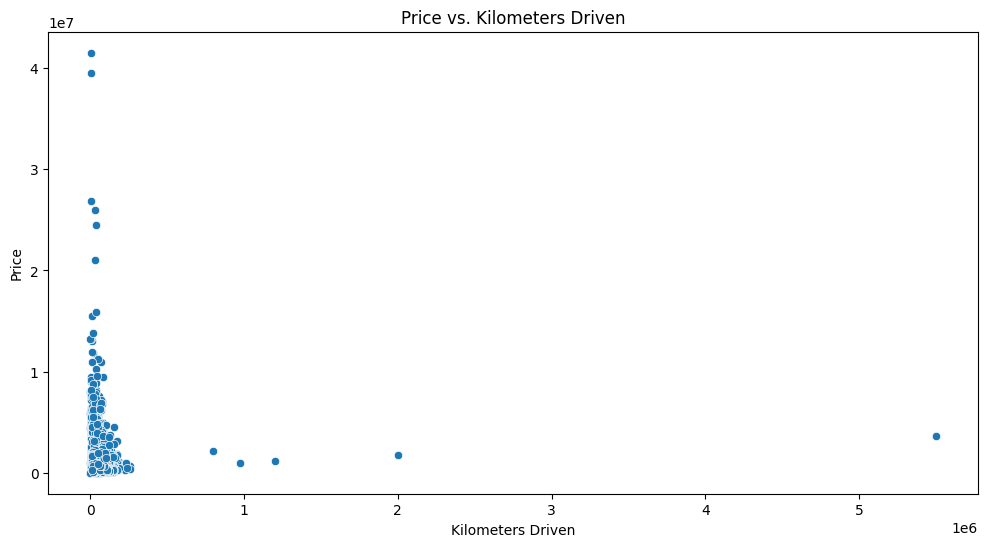

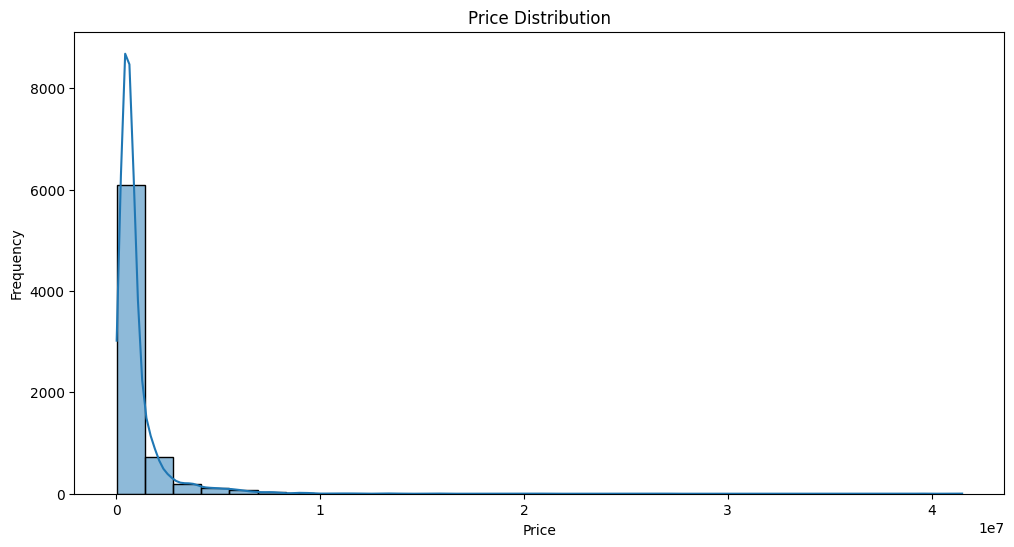

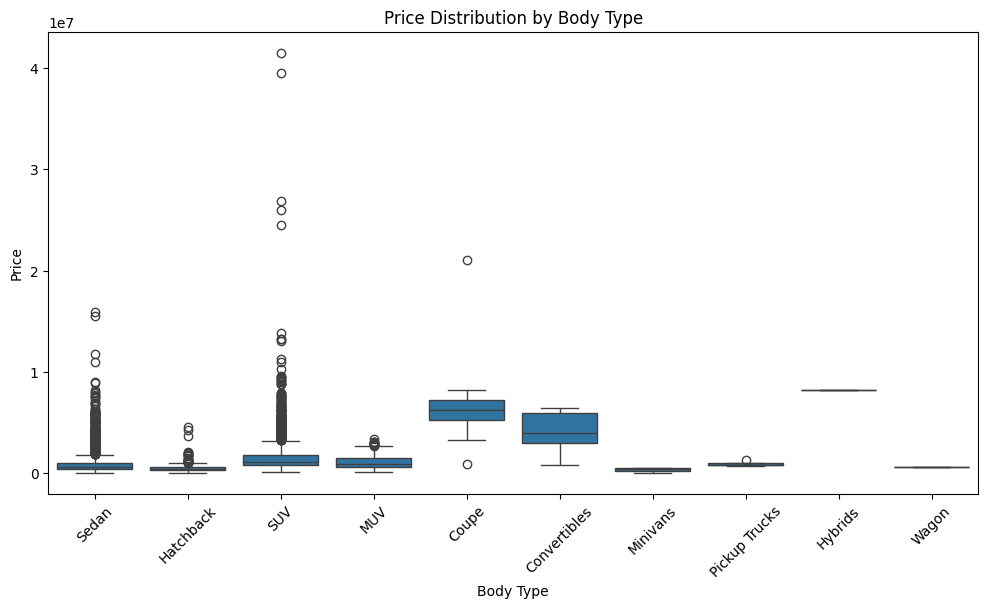

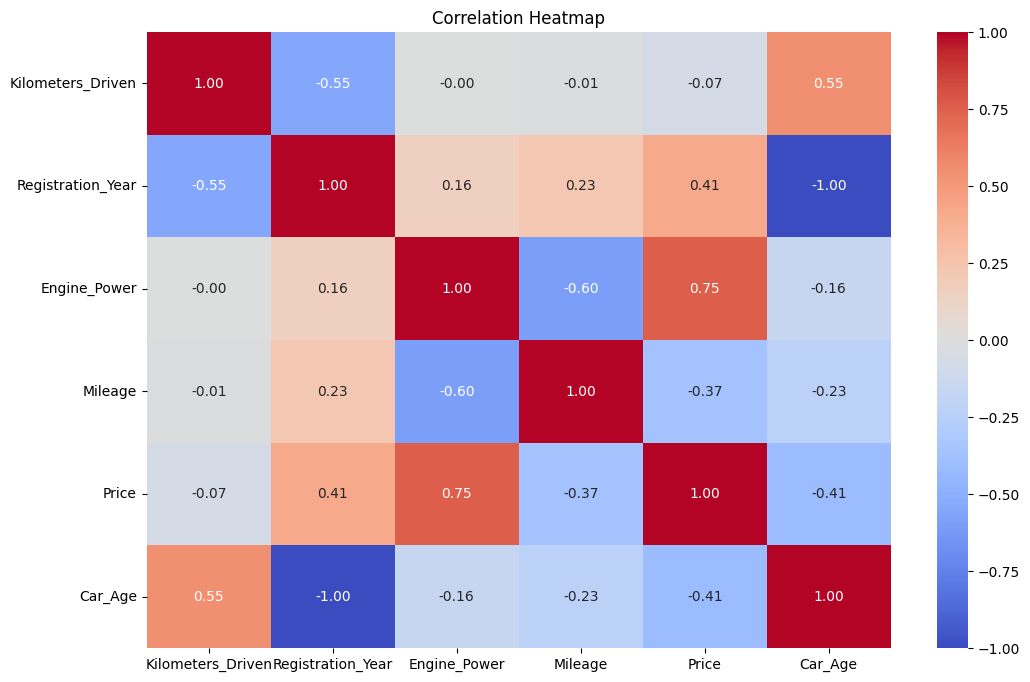

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_visualizations(df):
    # Scatter plot for Price vs. Kilometers Driven
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='Kilometers_Driven', y='Price')
    plt.title('Price vs. Kilometers Driven')
    plt.xlabel('Kilometers Driven')
    plt.ylabel('Price')
    plt.show()

    # Histogram for Price
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Price'], bins=30, kde=True)
    plt.title('Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

    # Box plot for Price by Body Type
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Body_Type', y='Price')
    plt.title('Price Distribution by Body Type')
    plt.xlabel('Body Type')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()

    # Correlation heatmap
    # Convert non-numeric columns to numeric or drop them
    numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
    corr = numeric_df.corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

create_visualizations(combined_df)


Feature Selection

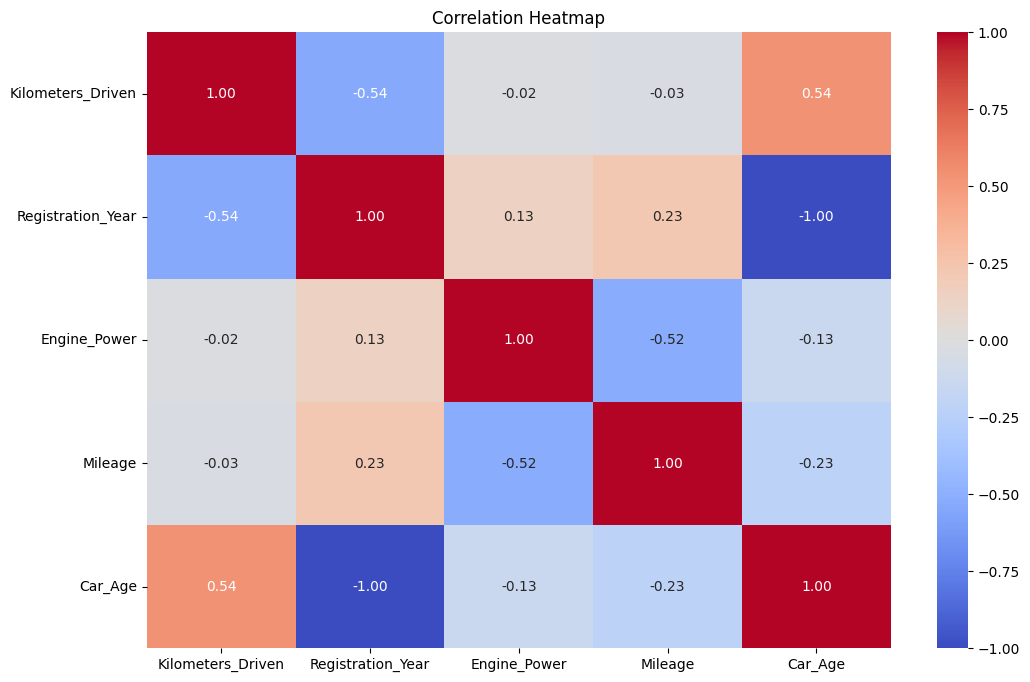

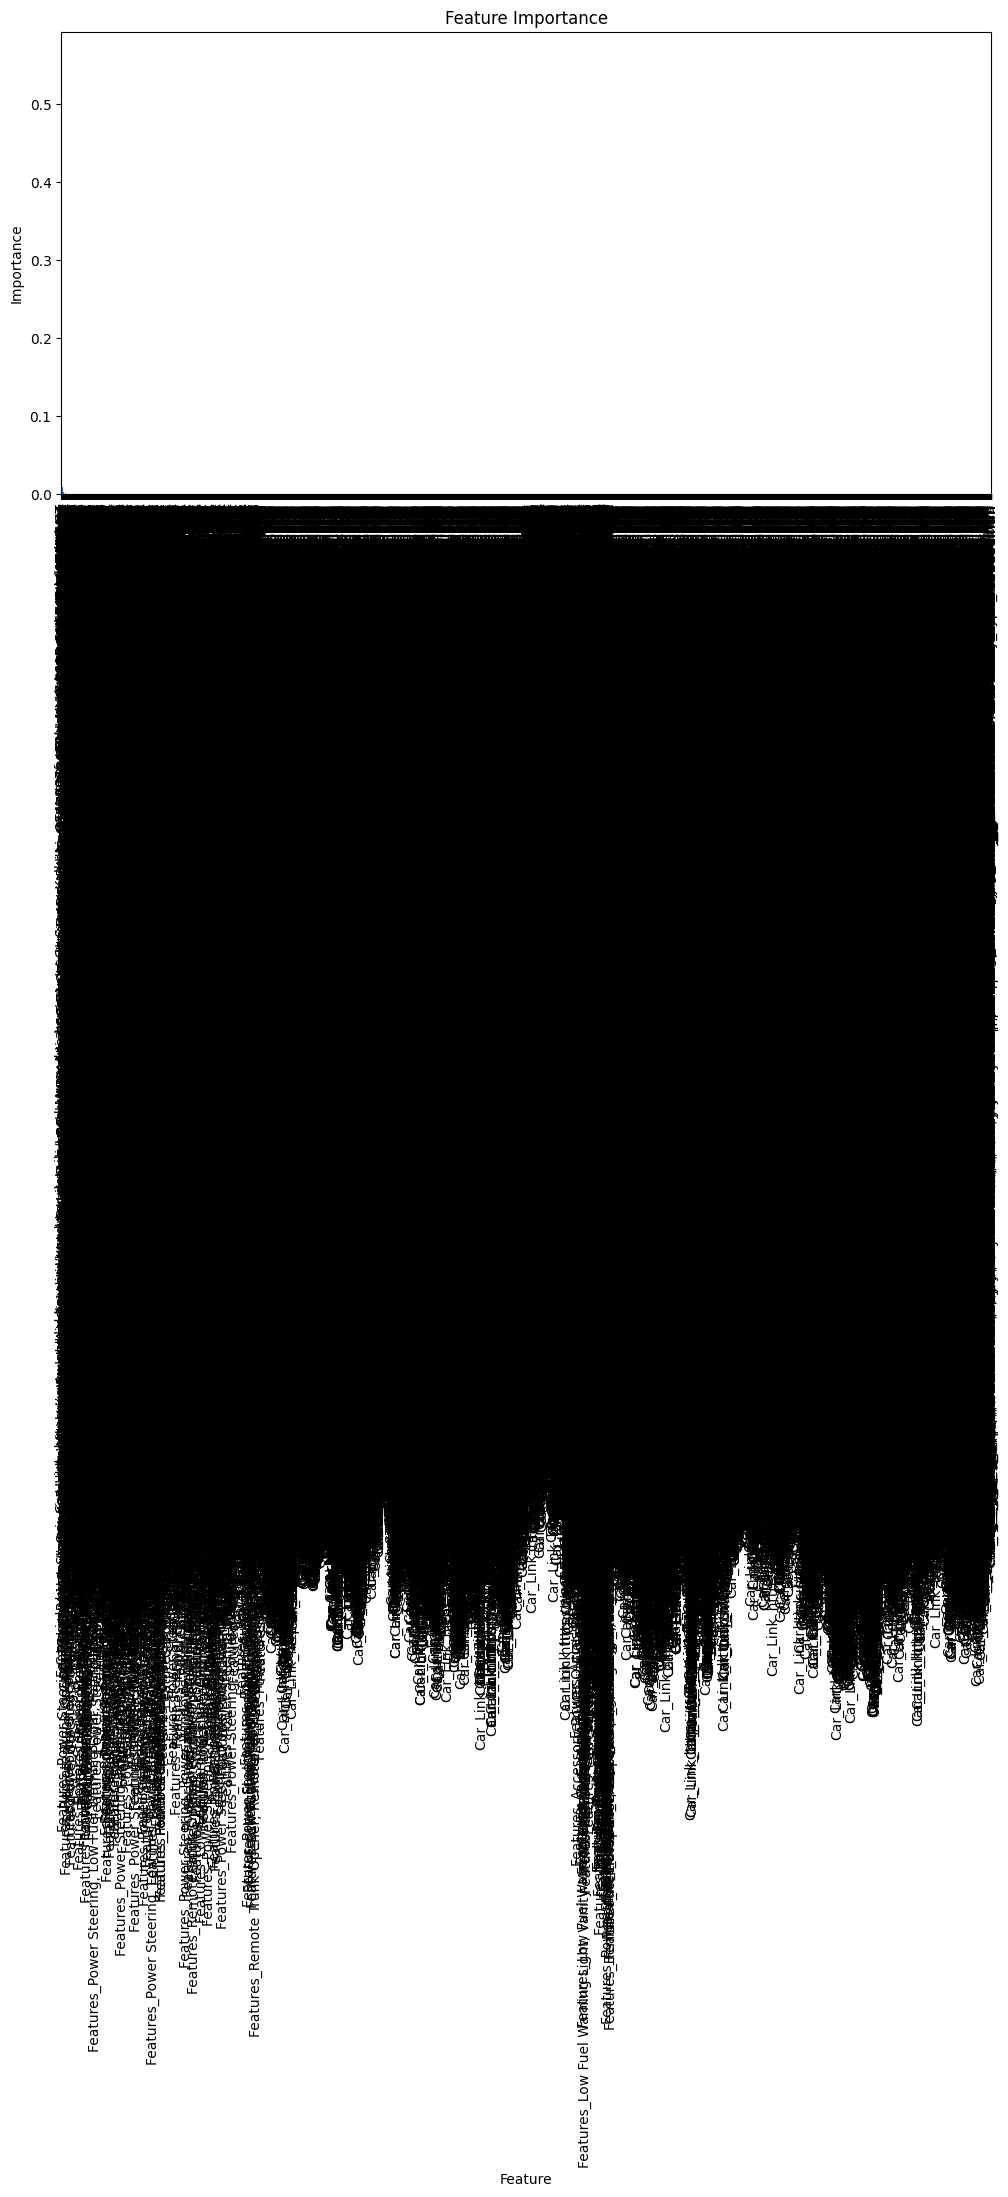

Feature Importances:
Engine_Power                                                                                                                                     0.563856
Registration_Year                                                                                                                                0.079272
Car_Link_https://www.cardekho.com/used-car-details/used-Mercedes-benz-Amg-Gt-S-cars-Kolkata_854e207f-a53b-4c48-9095-4165444d64dc.htm             0.074708
Car_Age                                                                                                                                          0.070819
Car_Model_Mercedes-Benz AMG GT                                                                                                                   0.054190
                                                                                                                                                   ...   
Car_Link_https://www.cardekho.com/buy-used-car-details/

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def feature_selection(df, target_column):
    # Convert categorical features to numeric using one-hot encoding
    df_encoded = pd.get_dummies(df)
    
    # Drop rows with missing values
    df_encoded = df_encoded.dropna()

    # Prepare data for feature importance
    X = df_encoded.drop(columns=[target_column])
    y = df_encoded[target_column]

    # Correlation analysis (for numeric columns only)
    numeric_df = X.select_dtypes(include=[float, int])
    plt.figure(figsize=(12, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Feature importance
    feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    
    plt.figure(figsize=(12, 6))
    feature_importances.plot(kind='bar')
    plt.title('Feature Importance')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

    return feature_importances

# Assuming 'Price' is the target column
feature_importances = feature_selection(combined_df, 'Price')
print("Feature Importances:")
print(feature_importances)


3.Model_Development

Explanation:
Data Preparation: Convert categorical variables to numeric and drop rows with missing values.
Train-Test Split: Split the data into training and testing sets (80-20 split).
Standardization: Scale numerical features using StandardScaler.
Model Training: Train various models and evaluate them using cross-validation.
Hyperparameter Tuning: Use Grid Search for Random Forest and Random Search for Gradient Boosting to find the best hyperparameters.

In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint

# Load the dataset
combined_df = pd.read_csv('cleaned_combined_cars.csv')

# Convert categorical features to numeric using one-hot encoding
df_encoded = pd.get_dummies(combined_df)
df_encoded = df_encoded.dropna()  # Drop rows with missing values

# Prepare data
target_column = 'Price'
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Training
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

results = {}

for model_name, model in models.items():
    # Cross-Validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    results[model_name] = {
        'CV Mean Score': np.mean(cv_scores),
        'CV Std Score': np.std(cv_scores)
    }
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    results[model_name]['Test MSE'] = mse

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  CV Mean Score: {-metrics['CV Mean Score']:.2f}")
    print(f"  CV Std Score: {metrics['CV Std Score']:.2f}")
    print(f"  Test MSE: {metrics['Test MSE']:.2f}\n")

# Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Random Forest Hyperparameter Tuning
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best score for Random Forest: {-grid_search_rf.best_score_:.2f}")

# Gradient Boosting Hyperparameter Tuning
random_search_gb = RandomizedSearchCV(estimator=GradientBoostingRegressor(), param_distributions=param_grid_gb, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search_gb.fit(X_train_scaled, y_train)
print(f"Best parameters for Gradient Boosting: {random_search_gb.best_params_}")
print(f"Best score for Gradient Boosting: {-random_search_gb.best_score_:.2f}")


Linear Regression:
  CV Mean Score: 584763541101.57
  CV Std Score: 408779842408.85
  Test MSE: 170811645236.44

Decision Tree:
  CV Mean Score: 576332537945.29
  CV Std Score: 382973616156.42
  Test MSE: 118513947448.69

Random Forest:
  CV Mean Score: 297835904826.83
  CV Std Score: 314691065646.74
  Test MSE: 88753674073.50

Gradient Boosting:
  CV Mean Score: 354158011390.86
  CV Std Score: 341763417743.10
  Test MSE: 101519622914.55

Best parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 50}
Best score for Random Forest: 297584318179.78
Best parameters for Gradient Boosting: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best score for Gradient Boosting: 307092973031.83


4.Model_Evaluation

Explanation:
Data Preparation:

Load the dataset and prepare features and target variable.
Use ColumnTransformer with OneHotEncoder to handle categorical features.
Train-Test Split:

Split the dataset into training and testing sets.
Standardization:

Standardize the features using StandardScaler.
Model Training and Evaluation:

Train different models (Linear Regression, Decision Tree, Random Forest, Gradient Boosting).
Predict the target values on the test set.
Compute evaluation metrics (MAE, MSE, R-squared).
Results Output:

Print the evaluation metrics for each model to compare their performance.

In [95]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load the dataset
combined_df = pd.read_csv('cleaned_combined_cars.csv')

# Prepare data
target_column = 'Price'
X = combined_df.drop(columns=[target_column])
y = combined_df[target_column]

# Convert categorical features to numeric using one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Apply preprocessing
X_encoded = preprocessor.fit_transform(X)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_encoded_imputed = imputer.fit_transform(X_encoded)

# Convert sparse matrix to dense array if necessary
if hasattr(X_encoded_imputed, 'toarray'):
    X_encoded_imputed = X_encoded_imputed.toarray()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded_imputed, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train models and evaluate performance
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        'Mean Absolute Error (MAE)': mae,
        'Mean Squared Error (MSE)': mse,
        'R-squared': r2
    }

# Print evaluation metrics
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Mean Absolute Error (MAE): {metrics['Mean Absolute Error (MAE)']:.2f}")
    print(f"  Mean Squared Error (MSE): {metrics['Mean Squared Error (MSE)']:.2f}")
    print(f"  R-squared: {metrics['R-squared']:.2f}\n")


Linear Regression:
  Mean Absolute Error (MAE): 305120.57
  Mean Squared Error (MSE): 495949299211.85
  R-squared: 0.67

Decision Tree:
  Mean Absolute Error (MAE): 221819.31
  Mean Squared Error (MSE): 406887357048.28
  R-squared: 0.73

Random Forest:
  Mean Absolute Error (MAE): 172115.40
  Mean Squared Error (MSE): 271679968135.37
  R-squared: 0.82

Gradient Boosting:
  Mean Absolute Error (MAE): 242754.25
  Mean Squared Error (MSE): 323450834539.71
  R-squared: 0.78



5.optimisation

In [98]:
print(combined_df.columns)


Index(['Fuel_Type', 'Body_Type', 'Kilometers_Driven', 'Registration_Year',
       'Car_Model', 'Ownership', 'Features', 'Engine_Power', 'Mileage',
       'Car_Link', 'Price', 'Car_Age', 'City'],
      dtype='object')


In [99]:
def feature_engineering(df):
    df['Car_Age'] = 2024 - df['Year_Of_Registration']  # Use the correct column name here
    df['Engine_Size_Power_Ratio'] = df['Engine Power'] / df['Kilometers_Driven']
    return df


In [108]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # Importing the SimpleImputer for handling NaNs

# Load the dataset
combined_df = pd.read_csv('cleaned_combined_cars.csv')

# Print column names to identify the correct name for 'Registration Year'
print("Column names in the dataset:", combined_df.columns)

# Feature Engineering
def feature_engineering(df):
    df['Car_Age'] = 2024 - df['Registration_Year']  # Adjust column name if necessary
    df['Engine_Size_Power_Ratio'] = df['Engine_Power'] / df['Kilometers_Driven']
    
    # Handle any potential division by zero or NaN values
    df['Engine_Size_Power_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['Engine_Size_Power_Ratio'].fillna(0, inplace=True)
    
    return df

combined_df = feature_engineering(combined_df)

# Prepare data
target_column = 'Price'
X = combined_df.drop(columns=[target_column])
y = combined_df[target_column]

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=[np.number]).columns

# Define the preprocessing steps, including imputation for missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numerical values with the mean
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values with the most frequent value
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline to preprocess and then fit the models
models = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Lasso Regression (L1)': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=0.1))
    ]),
    'Ridge Regression (L2)': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=0.1))
    ]),
    'Decision Tree': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor())
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor())
    ])
}

# Train models and evaluate performance
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        'Mean Absolute Error (MAE)': mae,
        'Mean Squared Error (MSE)': mse,
        'R-squared': r2
    }

# Print evaluation metrics
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Mean Absolute Error (MAE): {metrics['Mean Absolute Error (MAE)']:.2f}")
    print(f"  Mean Squared Error (MSE): {metrics['Mean Squared Error (MSE)']:.2f}")
    print(f"  R-squared: {metrics['R-squared']:.2f}\n")


Column names in the dataset: Index(['Fuel_Type', 'Body_Type', 'Kilometers_Driven', 'Registration_Year',
       'Car_Model', 'Ownership', 'Features', 'Engine_Power', 'Mileage',
       'Car_Link', 'Price', 'Car_Age', 'City'],
      dtype='object')


C:\Users\Anandvj\AppData\Local\Temp\ipykernel_16524\2890325506.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine_Size_Power_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Anandvj\AppData\Local\Temp\ipykernel_16524\2890325506.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

Linear Regression:
  Mean Absolute Error (MAE): 285068.60
  Mean Squared Error (MSE): 373616666431.49
  R-squared: 0.75

Lasso Regression (L1):
  Mean Absolute Error (MAE): 285283.42
  Mean Squared Error (MSE): 388109765825.20
  R-squared: 0.74

Ridge Regression (L2):
  Mean Absolute Error (MAE): 286960.48
  Mean Squared Error (MSE): 375682933991.07
  R-squared: 0.75

Decision Tree:
  Mean Absolute Error (MAE): 223862.07
  Mean Squared Error (MSE): 372372857931.03
  R-squared: 0.75

Random Forest:
  Mean Absolute Error (MAE): 174277.79
  Mean Squared Error (MSE): 273051489082.33
  R-squared: 0.82

Gradient Boosting:
  Mean Absolute Error (MAE): 240542.12
  Mean Squared Error (MSE): 315616542413.28
  R-squared: 0.79

